___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import datetime
from datetime import date
import random

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid") 

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

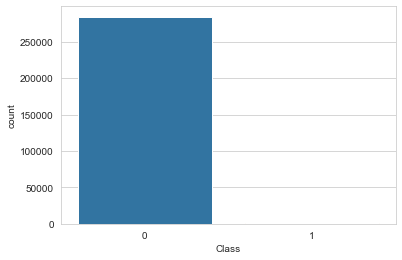

In [6]:
sns.countplot(df.Class);

### Exploratory Data Analysis

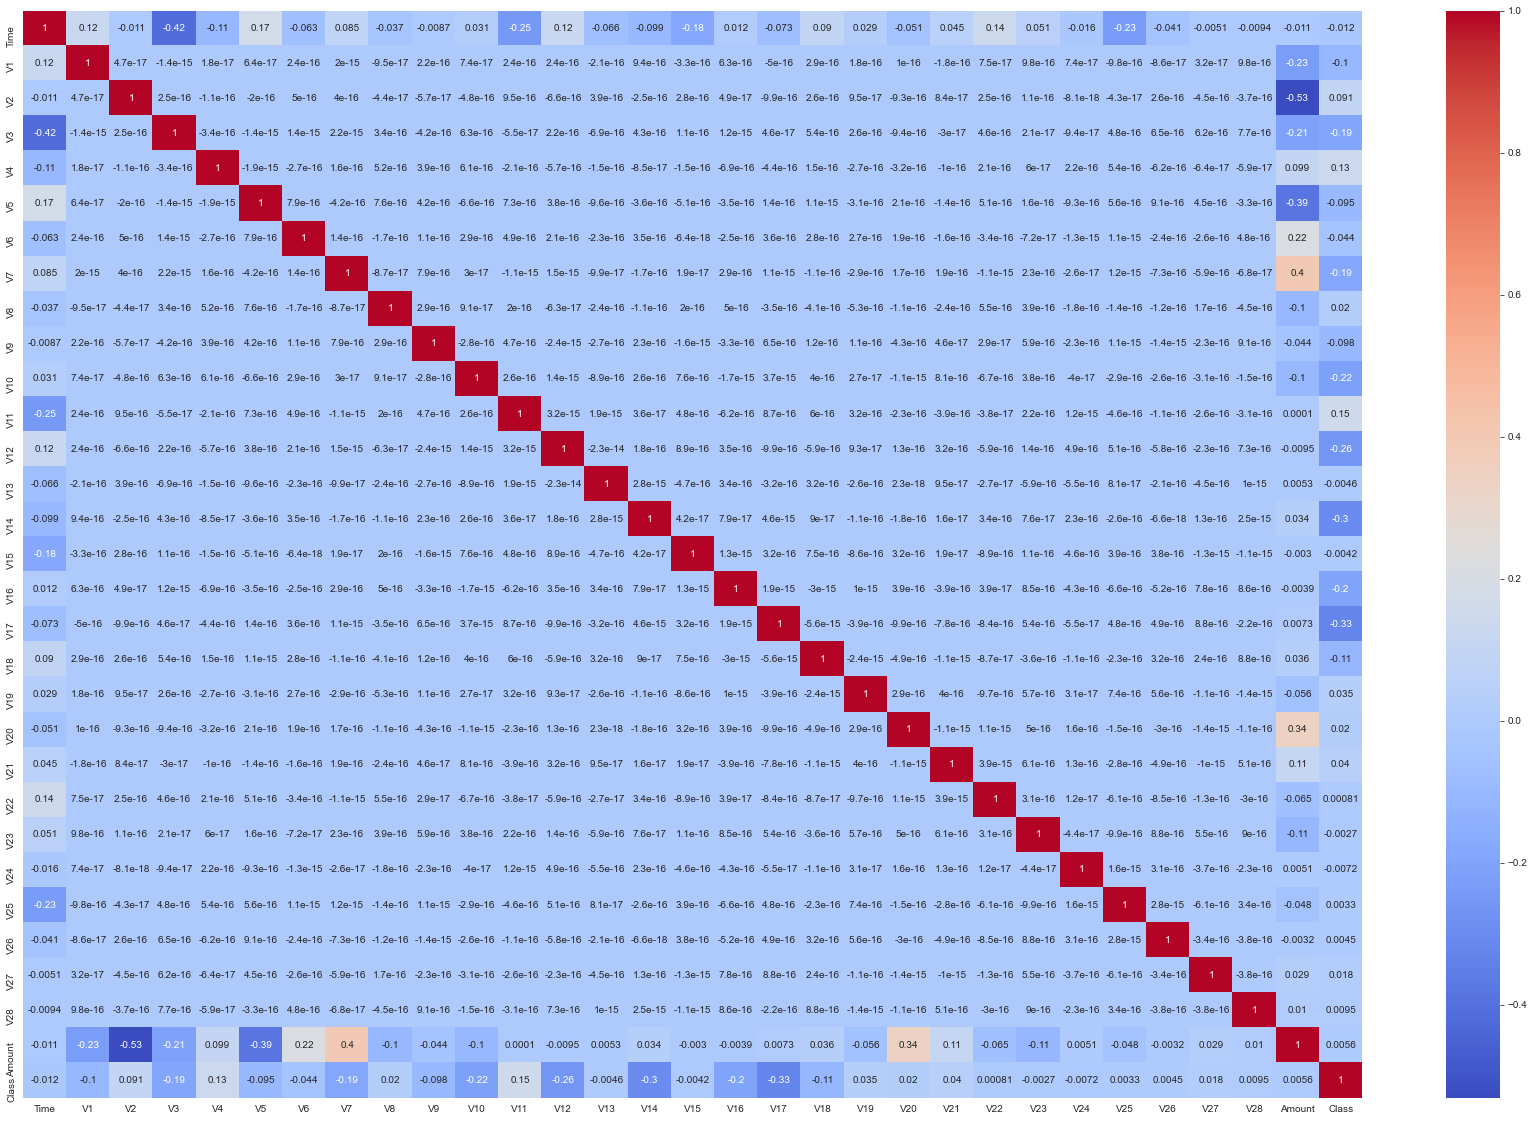

In [7]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

### Data Cleaning
Check Missing Values and Outliers

In [8]:
df.isnull().sum().any()

False

In [9]:
df.shape

(284807, 31)

In [10]:
df2=df.drop('Class', axis=1)

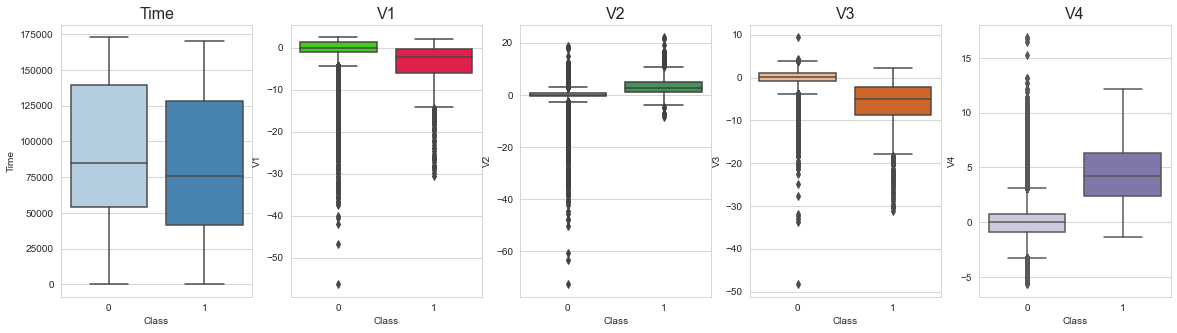

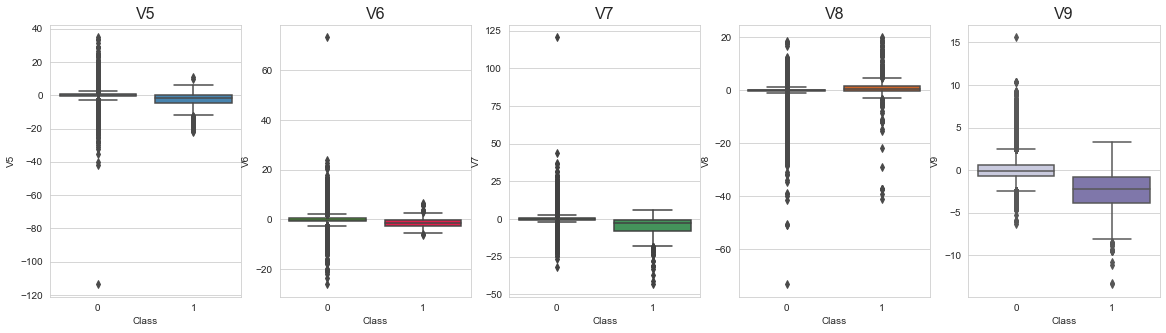

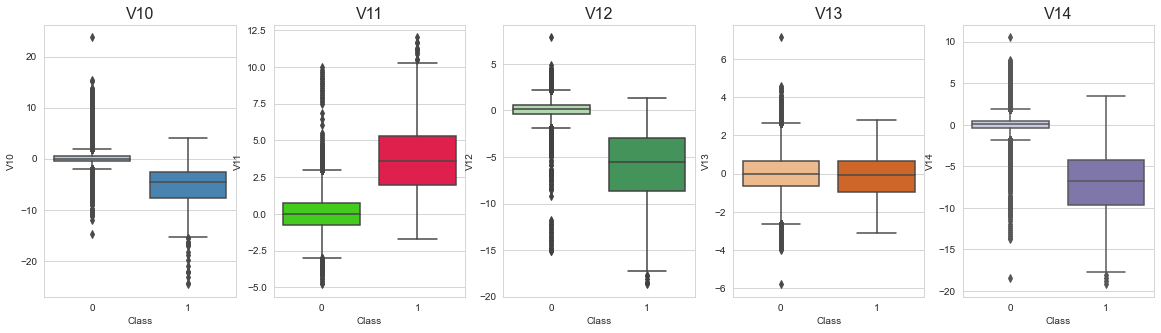

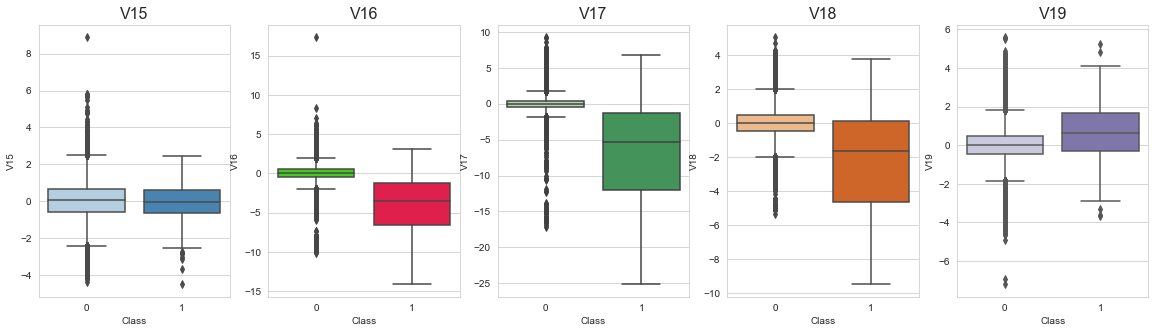

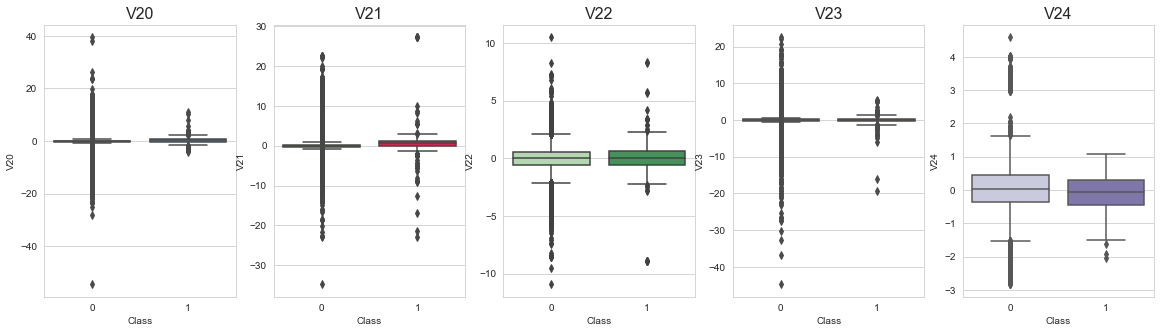

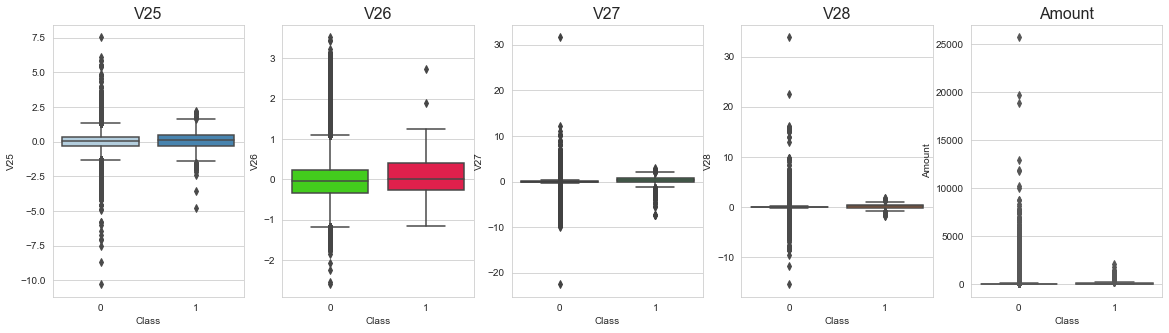

In [11]:
color=['Blues', 'prism', 'Greens', 'Oranges', 'Purples','prism']
for j in range(6):
    count=0
    plt.figure(figsize=(24,5))
    for i in df.columns[j*5:j*5+5]:
        plt.subplot(1, 6, count+1)
        count +=1
        sns.boxplot(y=df[i], data=df, x=df.Class, palette=color[count-1])
        plt.title(i, fontdict={'fontsize':16});

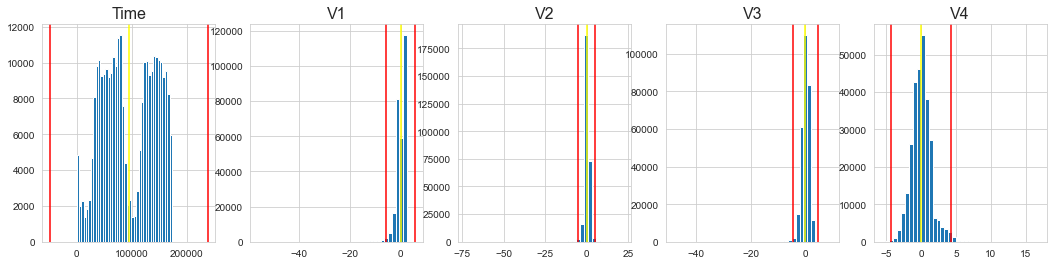

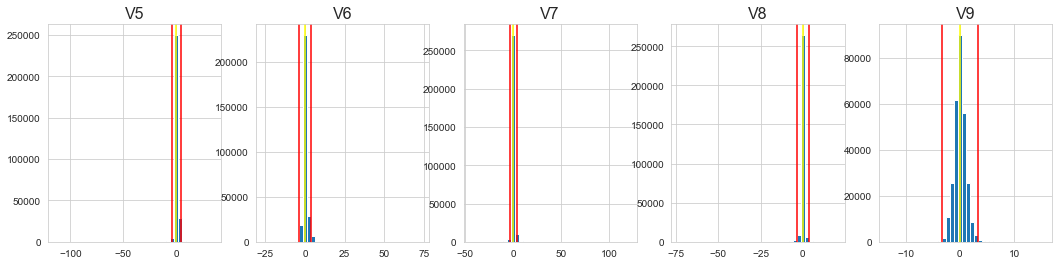

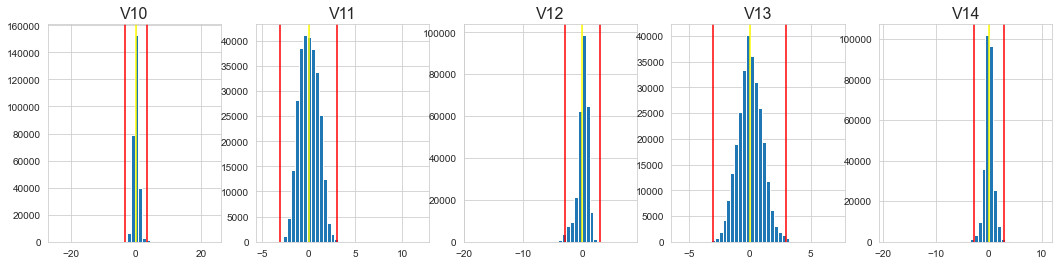

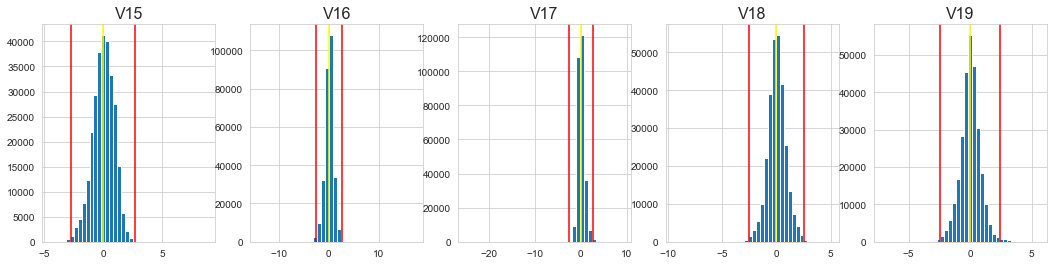

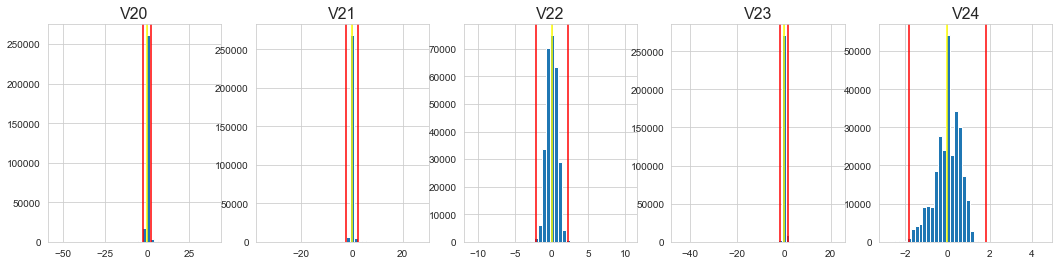

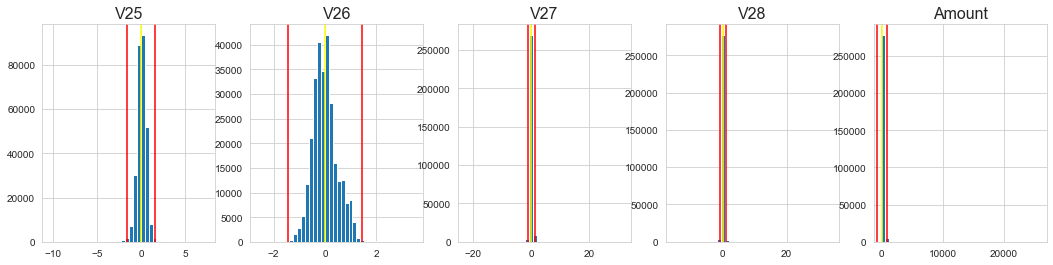

In [12]:
for j in range(6):
    count=0
    plt.figure(figsize=(18,4))
    for i in df2.columns[j*5:j*5+5]:
        plt.subplot(1, 5, count+1)
        plt.hist(df[i], bins = 40)
        plt.axvline(x=df[i].mean() + 3*df[i].std(),color='red')
        plt.axvline(x=df[i].mean() - 3*df[i].std(),color='red')
        plt.axvline(x=df[i].mean(), color='yellow')
        count +=1
        plt.title(i, fontdict={'fontsize':16});

---
---


In [13]:
df[df.Class==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284315.0,94838.202258,47484.015786,0.000000,54230.000000,84711.000000,139333.000000,172792.000000
V1,284315.0,0.008258,1.929814,-56.407510,-0.917544,0.020023,1.316218,2.454930
V2,284315.0,-0.006271,1.636146,-72.715728,-0.599473,0.064070,0.800446,18.902453
V3,284315.0,0.012171,1.459429,-48.325589,-0.884541,0.182158,1.028372,9.382558
V4,284315.0,-0.007860,1.399333,-5.683171,-0.850077,-0.022405,0.737624,16.875344
V5,284315.0,0.005453,1.356952,-113.743307,-0.689398,-0.053457,0.612181,34.801666
V6,284315.0,0.002419,1.329913,-26.160506,-0.766847,-0.273123,0.399619,73.301626
V7,284315.0,0.009637,1.178812,-31.764946,-0.551442,0.041138,0.571019,120.589494
V8,284315.0,-0.000987,1.161283,-73.216718,-0.208633,0.022041,0.326200,18.709255
V9,284315.0,0.004467,1.089372,-6.290730,-0.640412,-0.049964,0.598230,15.594995


In [14]:
df[df.Class==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,492.0,80746.806911,47835.365138,406.000000,41241.500000,75568.500000,128483.000000,170348.000000
V1,492.0,-4.771948,6.783687,-30.552380,-6.036063,-2.342497,-0.419200,2.132386
V2,492.0,3.623778,4.291216,-8.402154,1.188226,2.717869,4.971257,22.057729
V3,492.0,-7.033281,7.110937,-31.103685,-8.643489,-5.075257,-2.276185,2.250210
V4,492.0,4.542029,2.873318,-1.313275,2.373050,4.177147,6.348729,12.114672
V5,492.0,-3.151225,5.372468,-22.105532,-4.792835,-1.522962,0.214562,11.095089
V6,492.0,-1.397737,1.858124,-6.406267,-2.501511,-1.424616,-0.413216,6.474115
V7,492.0,-5.568731,7.206773,-43.557242,-7.965295,-3.034402,-0.945954,5.802537
V8,492.0,0.570636,6.797831,-41.044261,-0.195336,0.621508,1.764879,20.007208
V9,492.0,-2.581123,2.500896,-13.434066,-3.872383,-2.208768,-0.787850,3.353525


## 2. Data Preprocessing

#### Scaling

In [15]:
#@title
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
columns=df.columns[:-1]
scaler = MinMaxScaler()

scl=scaler.fit(df[columns])

scaled = scl.fit(df[columns])

df[columns] = scaled.transform(df[columns]) 

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,0.548717,0.274828,0.0,0.313681,0.490138,0.806290,1.0
V1,284807.0,0.958294,0.033276,0.0,0.942658,0.958601,0.980645,1.0
V2,284807.0,0.767258,0.017424,0.0,0.760943,0.767949,0.775739,1.0
V3,284807.0,0.837414,0.026275,0.0,0.821985,0.840530,0.855213,1.0
V4,284807.0,0.251930,0.062764,0.0,0.214311,0.251050,0.284882,1.0
V5,284807.0,0.765716,0.009292,0.0,0.761060,0.765351,0.769836,1.0
V6,284807.0,0.263020,0.013395,0.0,0.255295,0.260263,0.267027,1.0
V7,284807.0,0.265356,0.007537,0.0,0.261980,0.265600,0.268831,1.0
V8,284807.0,0.785385,0.012812,0.0,0.783148,0.785625,0.788897,1.0
V9,284807.0,0.462780,0.037846,0.0,0.440626,0.461008,0.483350,1.0


#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


In [19]:
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=33, stratify=y)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

***ii. Model Training***

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression().fit(X_train, y_train)

***iii. Prediction and Model Evaluating***

In [22]:
pred=log_reg.predict(X_train)

print(confusion_matrix(y_train,pred), "\n")
print(classification_report(y_train, pred))

[[198993     27]
 [   160    184]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.87      0.53      0.66       344

    accuracy                           1.00    199364
   macro avg       0.94      0.77      0.83    199364
weighted avg       1.00      1.00      1.00    199364



In [23]:
predictions=log_reg.predict(X_test)

print(confusion_matrix(y_test,predictions), "\n")
print(classification_report(y_test, predictions))
acc_log=accuracy_score(y_test, predictions)
print(acc_log)

[[85280    15]
 [   62    86]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.58      0.69       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443

0.9990988144142879



You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

In [24]:
from sklearn.metrics import average_precision_score

avg_prec_lr1 = average_precision_score(y_test, predictions)

print('Average precision-recall score: {0:0.2f}'.format(avg_prec_lr1))

Average precision-recall score: 0.50


***iv. Plot Precision and Recall Curve***


In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

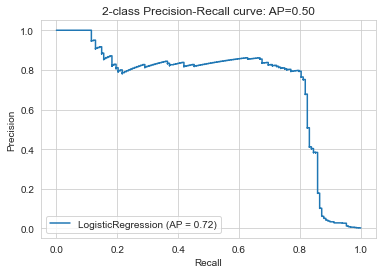

In [26]:
plt.figure(figsize=(6,4))
disp = plot_precision_recall_curve(log_reg, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(avg_prec_lr1));

***v. Apply and Plot StratifiedKFold***

In [27]:
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score

In [28]:
kfold = StratifiedKFold(n_splits= 10)
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }
dic={}
for i, j in custom_scorer.items():
    results = cross_val_score(log_reg, X_train, y_train, cv=kfold, n_jobs=-1, scoring = j)
    print(i, ": %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    dic[i]=round(results.mean()*100, 2)

accuracy : 99.90% (0.01%)
precision-0 : 99.92% (0.02%)
recall-0 : 99.99% (0.01%)
f1-0 : 99.95% (0.01%)
precision-1 : 87.38% (4.15%)
recall-1 : 52.29% (9.20%)
f1-1 : 64.86% (6.88%)


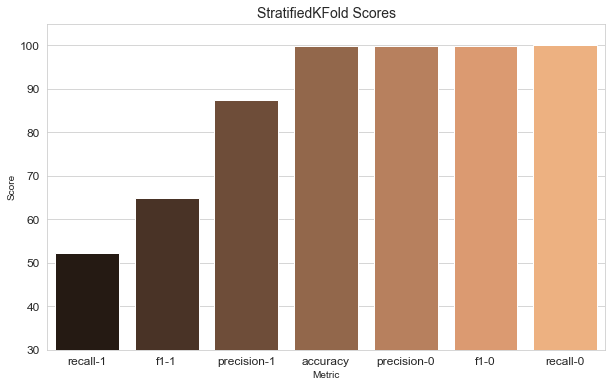

In [29]:
compare = pd.DataFrame(dic.items(), columns=['Metric', 'Score'])

compare = compare.sort_values(by='Score', ascending=True)

plt.figure(figsize=(10,6))
ax = sns.barplot(x="Metric", y="Score", data=compare, palette="copper")

plt.ylim(30, None)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("StratifiedKFold Scores", size=14);

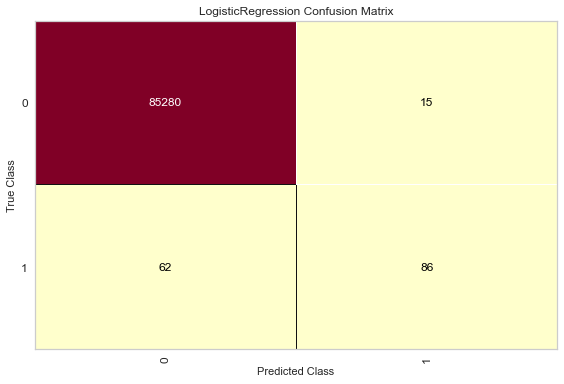

In [30]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(log_reg, classes=y_test.unique())
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

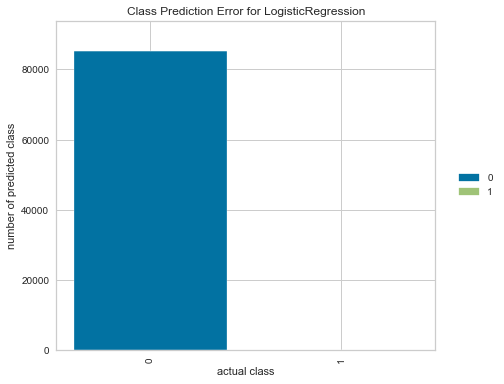

In [31]:
from yellowbrick.classifier import ClassPredictionError
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(LogisticRegression())
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.show();

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [32]:
!pip install imblearn

In [33]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [34]:
X=df.drop('Class', axis=1)
y=df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

# Increasing number of Class=1  equal to Class=0
sm = SMOTE(random_state=33)
X_train, y_train = sm.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_train)))

Resampled dataset shape Counter({0: 199023, 1: 199023})


### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

***ii. Model Training***

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg_sm=LogisticRegression().fit(X_train, y_train)

In [36]:
log_model_smote = LogisticRegression(C = 10).fit(X_train, y_train)

***iii. Prediction and Model Evaluating***

In [37]:
predictions=log_reg_sm.predict(X_test)

print(confusion_matrix(y_test,predictions), "\n")
print(classification_report(y_test, predictions))
acc_log_sm=accuracy_score(y_test, predictions)
print(acc_log_sm)

[[83492  1800]
 [   19   132]] 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85292
           1       0.07      0.87      0.13       151

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

0.9787109535011645


***iv.  Plot Precision and Recall Curve***


In [38]:
avg_prec_lr = average_precision_score(y_test, predictions)
print('Average precision-recall score: {0:0.2f}'.format(avg_prec_lr))

Average precision-recall score: 0.06


<Figure size 432x288 with 0 Axes>

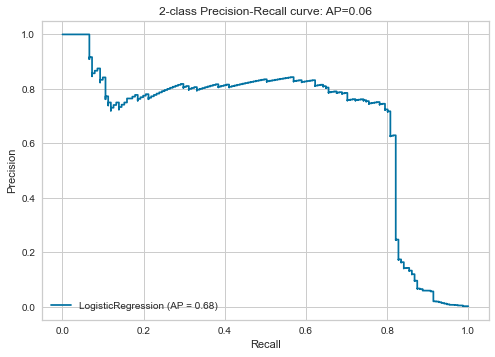

In [39]:
plt.figure(figsize=(6,4))
disp = plot_precision_recall_curve(log_reg_sm, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(avg_prec_lr));

***v. Apply and Plot StratifiedKFold***

In [40]:
kfold = StratifiedKFold(n_splits= 10)
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }
dic={}
for i, j in custom_scorer.items():
    results = cross_val_score(log_reg_sm, X_test, y_test, cv=kfold, n_jobs=-1, scoring = j)
    print(i, ": %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    dic[i]=round(results.mean()*100, 2)

accuracy : 99.87% (0.02%)
precision-0 : 99.89% (0.01%)
recall-0 : 99.99% (0.02%)
f1-0 : 99.94% (0.01%)
precision-1 : 85.61% (15.93%)
recall-1 : 36.50% (7.69%)
f1-1 : 50.24% (7.45%)


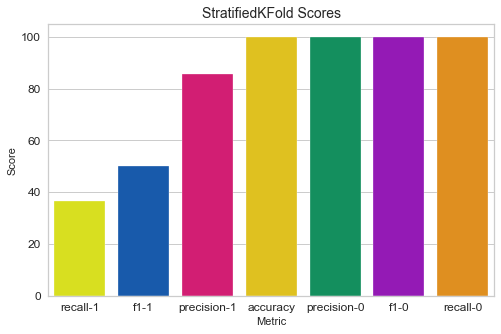

In [41]:
compare = pd.DataFrame(dic.items(), columns=['Metric', 'Score'])

compare = compare.sort_values(by='Score', ascending=True)

plt.figure(figsize=(8,5))
ax = sns.barplot(x="Metric", y="Score", data=compare, palette="prism")

#plt.ylim(20, None)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("StratifiedKFold Scores", size=14);

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train, y_train)

***ii. Prediction and Model Evaluating***

In [43]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred), '\n')
print(classification_report(y_test,rfc_pred))
acc_rfc=accuracy_score(y_test, rfc_pred)
print(acc_rfc)

[[85277    15]
 [   34   117]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.89      0.77      0.83       151

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

0.9994265182636377


***iii. Plot Precision and Recall Curve***


In [44]:
avg_prec_rfc = average_precision_score(y_test, rfc_pred)
print('Average precision-recall score: {0:0.2f}'.format(avg_prec_rfc))

Average precision-recall score: 0.69


<Figure size 432x288 with 0 Axes>

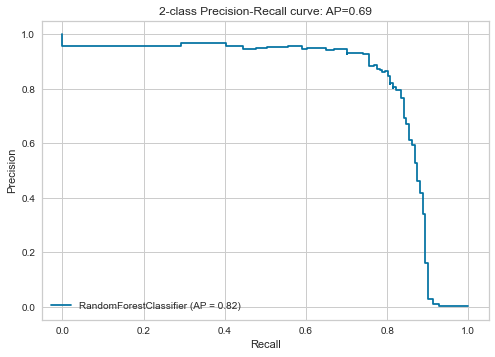

In [45]:
plt.figure(figsize=(6,4))
disp = plot_precision_recall_curve(rfc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(avg_prec_rfc));

***iv. Apply and Plot StratifiedKFold***

In [46]:
kfold = StratifiedKFold(n_splits= 10)
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }
dic={}
for i, j in custom_scorer.items():
    results = cross_val_score(rfc, X_test, y_test, cv=kfold, n_jobs=-1, scoring = j)
    print(i, ": %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    dic[i]=round(results.mean()*100, 2)

accuracy : 99.94% (0.02%)
precision-0 : 99.95% (0.02%)
recall-0 : 99.99% (0.01%)
f1-0 : 99.97% (0.01%)
precision-1 : 92.86% (8.17%)
recall-1 : 74.17% (8.14%)
f1-1 : 80.14% (5.76%)


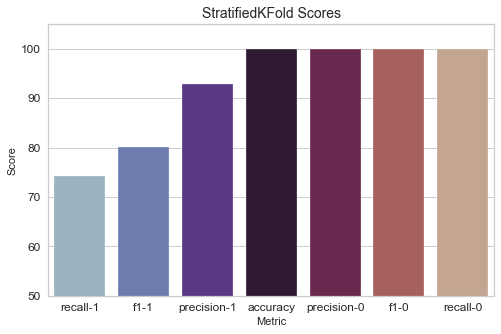

In [47]:
compare = pd.DataFrame(dic.items(), columns=['Metric', 'Score'])

compare = compare.sort_values(by='Score', ascending=True)

plt.figure(figsize=(8,5))
ax = sns.barplot(x="Metric", y="Score", data=compare, palette="twilight")

plt.ylim(50, None)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("StratifiedKFold Scores", size=14);

### Feature Importance

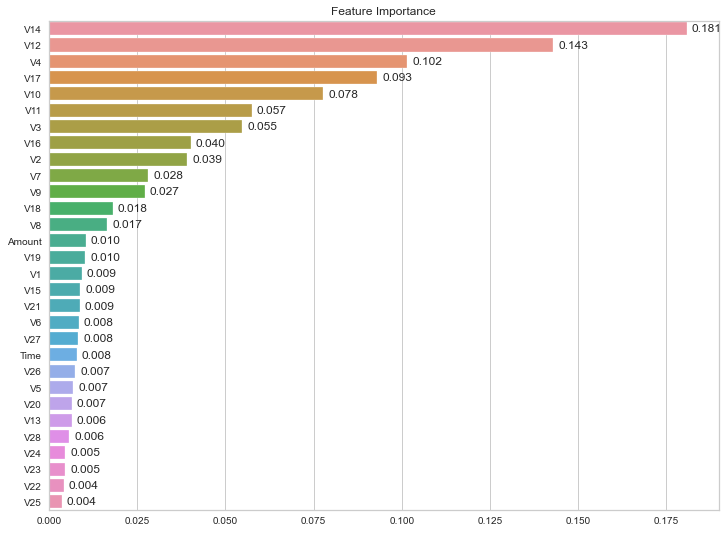

In [48]:
from sklearn.feature_selection import RFE
selector = RFE(rfc, n_features_to_select=30, step=10,verbose=2)
selector = selector.fit(X, y)
selector.support_

features = []
for i in list(enumerate(selector.support_.tolist())):
    if i[1] == True:
        features.append(i[0])
features
X.columns[features]

feature_imp = pd.Series(rfc.feature_importances_[features],
                        index=X_train.columns[features]).sort_values(ascending=False)
plt.figure(figsize=(12,9))
ax = sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")


for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show()

In [49]:
X2= df[['V14', 'V17', 'V10', 'V4', 'V12', 'V11', 'V3', 'V16', 'V2']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.30, stratify = y, random_state=33)

In [50]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
os = SMOTE(random_state=42)
os_data_X2, os_data_y2=os.fit_sample(X_train2, y_train2)
os_data_X2 = pd.DataFrame(data=os_data_X2,columns= X2.columns)
os_data_y2 = pd.DataFrame(data=os_data_y2,columns=["Class"])

In [51]:
rf = RandomForestClassifier().fit(os_data_X2, os_data_y2)

In [52]:
y_pred = rf.predict(X_test2)
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred))

[[85262    33]
 [   31   117]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.79      0.79       148

    accuracy                           1.00     85443
   macro avg       0.89      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [53]:
custom_scorer = {
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(rf, X_test2, y_test2, cv = 10, scoring = j)
    print(f" {i} score for rf_model : {scores.mean()} std: {scores.std()}\n")

 precision-1 score for rf_model : 0.8757858807858806 std: 0.07471147042688472

 recall-1 score for rf_model : 0.7633333333333333 std: 0.08550370959052889

 f1-1 score for rf_model : 0.8084574684574685 std: 0.07030167123060031



### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score
from tensorflow.keras.callbacks import EarlyStopping

***ii. Define Model***

In [55]:
early_stop = EarlyStopping(monitor="val_loss", verbose =2, mode="min", patience = 15, restore_best_weights=True)
model = Sequential()

model.add(Dense(30,activation='relu')) 
model.add(BatchNormalization())
model.add(Dense(15,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1,activation='sigmoid'))
opt = Adam(learning_rate=0.0001)

***iii. Compile Model***

In [56]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics = ["accuracy"])

***iv. Fit Model***

In [57]:
model.fit(x=X_train.values, 
          y=y_train.values, 
          batch_size = 128,
          epochs=100,
          validation_data=(X_test.values, y_test.values), verbose=1, callbacks = [early_stop])

Epoch 1/100
3110/3110 [==============================] - 4s 1ms/step - loss: 0.3194 - accuracy: 0.8673 - val_loss: 0.0860 - val_accuracy: 0.9782
Epoch 2/100
3110/3110 [==============================] - 2s 793us/step - loss: 0.1129 - accuracy: 0.9554 - val_loss: 0.1135 - val_accuracy: 0.9659
Epoch 3/100
3110/3110 [==============================] - 2s 784us/step - loss: 0.0848 - accuracy: 0.9665 - val_loss: 0.0595 - val_accuracy: 0.9806
Epoch 4/100
3110/3110 [==============================] - 2s 782us/step - loss: 0.0680 - accuracy: 0.9741 - val_loss: 0.0466 - val_accuracy: 0.9851
Epoch 5/100
3110/3110 [==============================] - 2s 798us/step - loss: 0.0574 - accuracy: 0.9792 - val_loss: 0.0292 - val_accuracy: 0.9909
Epoch 6/100
3110/3110 [==============================] - 2s 787us/step - loss: 0.0514 - accuracy: 0.9815 - val_loss: 0.0439 - val_accuracy: 0.9850
Epoch 7/100
3110/3110 [==============================] - 3s 826us/step - loss: 0.0471 - accuracy: 0.9833 - val_loss: 0.0

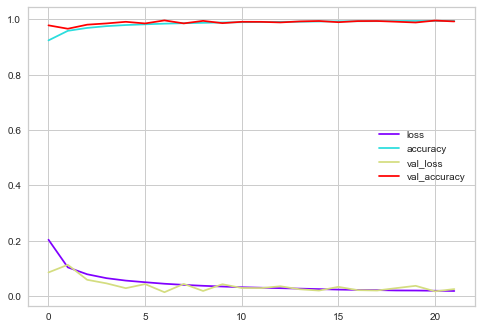

In [58]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(colormap ='rainbow');

***v. Prediction and Model Evaluating***

In [59]:
pred_nn = model.predict_classes(X_test)

print(confusion_matrix(y_test,pred_nn), '\n', '\n')
print(classification_report(y_test,pred_nn))
acc_nn=accuracy_score(y_test, pred_nn)
print(acc_nn)

[[84972   320]
 [   25   126]] 
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.28      0.83      0.42       151

    accuracy                           1.00     85443
   macro avg       0.64      0.92      0.71     85443
weighted avg       1.00      1.00      1.00     85443

0.9959622204276535


In [71]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(30,activation='relu')) 
    model.add(BatchNormalization())
    model.add(Dense(15,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=1,activation='sigmoid'))
    opt = Adam(learning_rate=0.0001)
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model
# evaluate model with standardized dataset
early_stop = EarlyStopping(monitor="val_loss", verbose =2, mode="min", patience = 10, restore_best_weights=True)
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=128, verbose=0)
kfold = StratifiedKFold(n_splits=10)
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

dic={}
for i, j in custom_scorer.items():
    results = cross_val_score(estimator, X_test.values, y_test.values, cv=kfold, n_jobs=-1, scoring = j, fit_params={'callbacks':early_stop})
    print(i, ": %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    dic[i]=round(results.mean()*100, 2)

accuracy : 99.93% (0.02%)
precision-1 : 84.40% (12.72%)
recall-1 : 75.46% (9.04%)
f1-1 : 77.60% (3.31%)


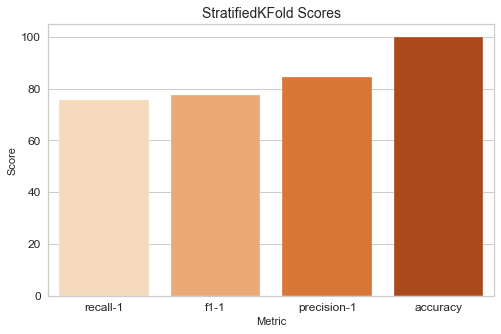

In [74]:
compare = pd.DataFrame(dic.items(), columns=['Metric', 'Score'])

compare = compare.sort_values(by='Score', ascending=True)

plt.figure(figsize=(8,5))
ax = sns.barplot(x="Metric", y="Score", data=compare, palette="Oranges")

#plt.ylim(50, None)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("StratifiedKFold Scores", size=14);

***vi. Plot Precision and Recall Curve***

In [64]:
avg_prec_nn = average_precision_score(y_test, pred_nn)
print('Average precision-recall score: {0:0.2f}'.format(avg_prec_nn))

Average precision-recall score: 0.24


<Figure size 432x288 with 0 Axes>

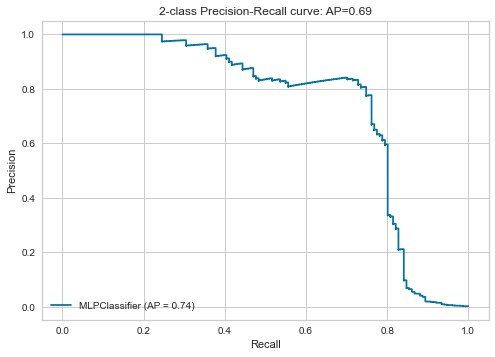

In [65]:
plt.figure(figsize=(6,4))
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(avg_prec_rfc));

### Model Comparison

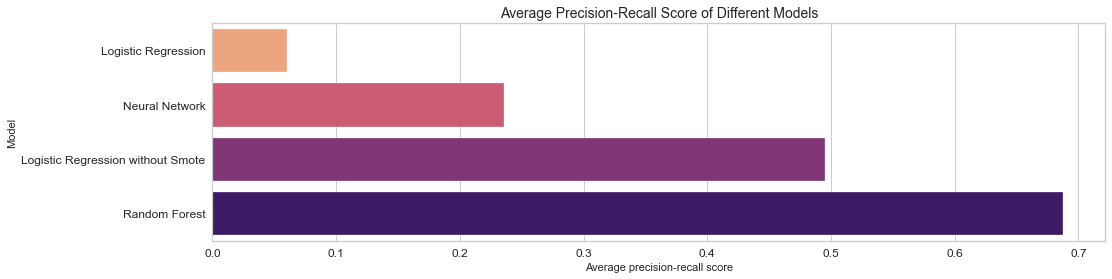

In [66]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Random Forest", "Neural Network", "Logistic Regression without Smote"],
                        "Average precision-recall score": [avg_prec_lr, avg_prec_rfc, avg_prec_nn, avg_prec_lr1]})

compare = compare.sort_values(by="Average precision-recall score", ascending=True)

plt.figure(figsize=(16,4))
ax = sns.barplot(x="Average precision-recall score", y="Model", data=compare, palette="magma_r")

#plt.xlim(0.40, None)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("Average Precision-Recall Score of Different Models", size=14);

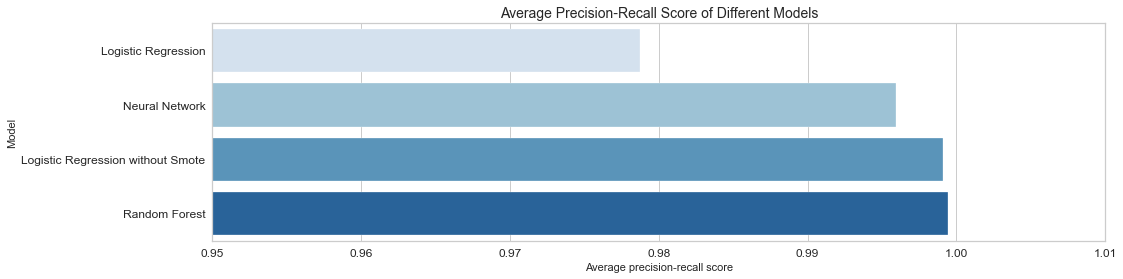

In [67]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Random Forest", "Neural Network", "Logistic Regression without Smote"],
                        "Average precision-recall score": [acc_log_sm, acc_rfc, acc_nn, acc_log]})

compare = compare.sort_values(by="Average precision-recall score", ascending=True)

plt.figure(figsize=(16,4))
ax = sns.barplot(x="Average precision-recall score", y="Model", data=compare, palette="Blues")

plt.xlim(0.95, 1.01)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("Average Precision-Recall Score of Different Models", size=14);

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to *Pycharm* and create your web app with Flask API.

### Save and Export the Model as .pkl


In [68]:
import pickle
pickle.dump(rf, open('rf_model.pkl', 'wb'))

### Save and Export Variables as .pkl

In [69]:
pickle.dump(X2.columns, open('variables.pkl', 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___